### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


<AxesSubplot:>

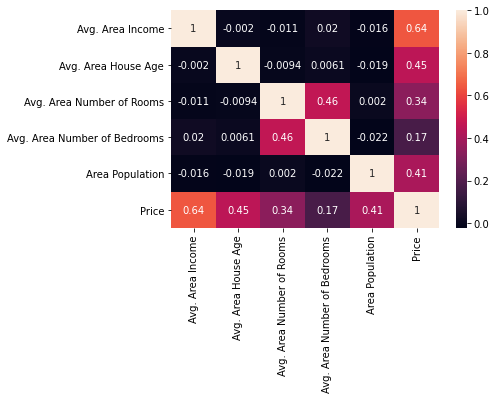

In [3]:
sns.heatmap(df.corr(), annot= True)

# Sin los valores estandarizados

In [4]:
x = df['Avg. Area Income']
y = df['Price']

In [5]:
x = np.array(x)
x = x.reshape(-1,1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [7]:
model = SVR(max_iter=1000)
name='Non linear regression'
kfold = model_selection.KFold(n_splits=8, random_state=42, shuffle= True) #Parte los datos en 8 trozos para usar validación cruzada / cross validation
# cross_val_score 
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("----------")
print("----------")

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in

In [8]:
svr_model = SVR(kernel='poly', degree=2, C=100)
model = svr_model.fit(x_train, y_train)

In [9]:
prediction = svr_model.predict(x_test)

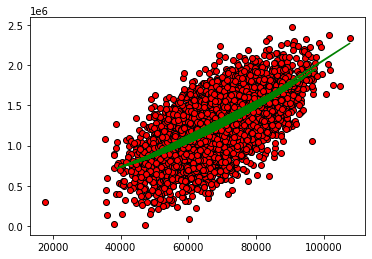

In [10]:
plt.scatter(x,y, color= 'red', edgecolors='black')
plt.plot(x_test, prediction, color= 'green')

In [11]:
model.score(x_test, y_test) * 100

39.32083889263922

In [12]:
model.score(x_train,y_train) * 100

41.04953838739818

# Ahora misma columna con los valores estandarizados

In [13]:
scaler = MinMaxScaler()
scaler.fit(x)
x_normalized = scaler.fit_transform(x)
x_normalized

array([[0.68682217],
       [0.68352073],
       [0.48373705],
       ...,
       [0.50713527],
       [0.55841872],
       [0.53071451]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state= 42)

In [15]:
svr_model = SVR(kernel='linear', degree=2, C= 100)
svr_model.fit(x_train, y_train)

SVR(C=100, degree=2, kernel='linear')

In [16]:
svr_model.score(x_test, y_test) * 100

0.8150759631520121

In [17]:
predict = svr_model.predict(x_test)

In [18]:
metrics.r2_score(y_test, predict)

0.008150759631520121

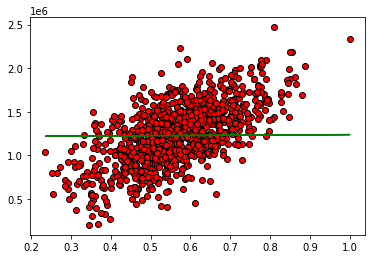

In [19]:
plt.scatter(x_test,y_test, color= 'red', edgecolors='black')
plt.plot(x_test, predict, color= 'green')

In [20]:
x1 = np.array(df['Avg. Area House Age'])
x1 = x1.reshape(-1,1)
y = df['Price']
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size= 0.2, random_state= 42)
svr_model = SVR(kernel='poly', degree=2, C=100)
model = svr_model.fit(x1_train, y_train)
model.score(x1_test, y_test) * 100

20.982453338897887

In [21]:
x = np.array(df['Avg. Area Number of Rooms'])
x = x.reshape(-1,1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
svr_model = SVR(kernel='poly', degree=2, C=100)
model = svr_model.fit(x_train, y_train)
model.score(x_test, y_test) * 100

12.852950181400491

In [22]:
x = np.array(df['Avg. Area Number of Bedrooms'])
x = x.reshape(-1,1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
svr_model = SVR(kernel='poly', degree=2, C=100)
model = svr_model.fit(x_train, y_train)
model.score(x_test, y_test) * 100

1.750835483867308

In [23]:
x = np.array(df['Area Population'])
x = x.reshape(-1,1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
svr_model = SVR(kernel='poly', degree=2, C=100)
model = svr_model.fit(x_train, y_train)
model.score(x_test, y_test) * 100

15.852897391565147

In [24]:
list_of_x = ['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population' ]

In [25]:
def try_SVR(x, y, dataframe):
    columns = []
    solvers = []
    scores = []
    params = ['linear', 'rbf', 'poly']
    for val in x:
        new_x = np.array(dataframe[val]).reshape(-1,1)
        scaler = StandardScaler()
        standard_x = scaler.fit_transform(new_x)
        x_train, x_test, y_train, y_test = train_test_split(standard_x, y, train_size= 0.2, random_state= 42)
        for p in params:
            solvers.append(p)
            columns.append(val)
            svr_model = SVR(kernel= p, C=100, gamma= 0.1, epsilon= 0.1)
            model = svr_model.fit(x_test, y_test)
            score = model.score(x_train, y_train) * 100
            scores.append(score)

    dic_svr = {'columns': columns, 'solvers': solvers, 'scores': scores}
    score_df = pd.DataFrame(dic_svr) 
    return score_df






In [26]:
try_SVR(list_of_x, df['Price'], df)

,columns,solvers,scores
0,Avg. Area Income,linear,31.402795
1,Avg. Area Income,rbf,7.834206
2,Avg. Area Income,poly,0.542401
3,Avg. Area House Age,linear,15.804362
4,Avg. Area House Age,rbf,4.010691
5,Avg. Area House Age,poly,0.283151
6,Avg. Area Number of Rooms,linear,8.040145
7,Avg. Area Number of Rooms,rbf,1.996927
8,Avg. Area Number of Rooms,poly,0.134238
9,Area Population,linear,13.269670


### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 


In [27]:
df['Avg. Area Number of Bedrooms'] = round(df['Avg. Area Number of Bedrooms'], 0)

In [28]:
y = df['Avg. Area Number of Bedrooms'].astype(int)

<AxesSubplot:>

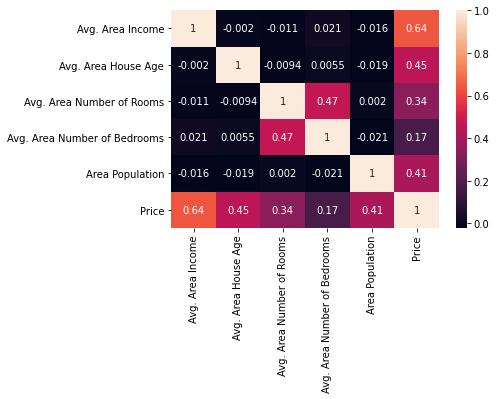

In [29]:
sns.heatmap(df.corr(), annot= True)

In [30]:
x = np.array(df['Avg. Area Income'])
x = x.reshape(-1,1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
svc_model = LinearSVC(C=1000,dual=False)
svc_model.fit(x_train, y_train)

LinearSVC(C=1000, dual=False)

In [33]:
prediction = svc_model.predict(x)
prediction

array([4, 4, 4, ..., 4, 4, 4])

In [34]:
svc_model.score(x_train, y_train) * 100

29.75

In [35]:
svc_model.score(x_test, y_test) * 100

29.2

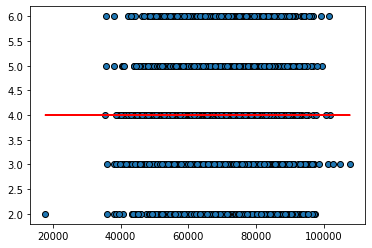

In [36]:
plt.scatter(x, y, edgecolors='black')
plt.plot(x, prediction, color= 'r')

In [37]:
import math

In [38]:
def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [39]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.0,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.0,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.0,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.0,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.0,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.0,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.0,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.0,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.0,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [40]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].map(normal_round)

In [41]:
list_of_x = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

In [48]:
def try_SVC(x, y, dataframe):
    columns = []
    solvers = []
    train_scores = []
    test_scores = []
    params = ['linear', 'rbf', 'poly']
    for val in x:
        new_x = np.array(dataframe[val]).reshape(-1,1)
        scaler = StandardScaler()
        standard_x = scaler.fit_transform(new_x)
        x_train, x_test, y_train, y_test = train_test_split(standard_x, y, train_size= 0.2, random_state= 42)
        for p in params:
            solvers.append(p)
            columns.append(val)
            svc_model = SVC(kernel= p, C=100, gamma= 0.1)
            model = svc_model.fit(x_train, y_train)
            train_score = model.score(x_train, y_train) * 100
            train_scores.append(train_score)
            test_score = model.score(x_test, y_test) * 100
            test_scores.append(test_score)

    dic_svc = {'columns': columns, 'solvers': solvers, 'train score': train_scores, 'test score': test_scores}
    score_df = pd.DataFrame(dic_svc) 
    return score_df

In [49]:
try_SVC(list_of_x, df['Avg. Area Number of Bedrooms'], df)

,columns,solvers,train score,test score
0,Avg. Area Income,linear,30.7,29.375
1,Avg. Area Income,rbf,32.2,29.300
2,Avg. Area Income,poly,30.7,29.375
3,Avg. Area House Age,linear,30.7,29.375
4,Avg. Area House Age,rbf,31.2,28.700
5,Avg. Area House Age,poly,30.7,29.375
6,Avg. Area Number of Rooms,linear,31.9,29.500
7,Avg. Area Number of Rooms,rbf,32.1,29.575
8,Avg. Area Number of Rooms,poly,31.6,29.275
9,Area Population,linear,30.9,28.700


In [50]:
global_x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']]

In [51]:
y = df['Avg. Area Number of Bedrooms']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(global_x, y, test_size= 0.2, random_state= 42)

In [54]:
global_svc = SVC(kernel= 'rbf', C=100, gamma= 0.1)
global_svc.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [56]:
global_svc.score(x_test, y_test) * 100

29.2

In [57]:
global_svc.score(x_train, y_train) * 100

100.0

<AxesSubplot:>

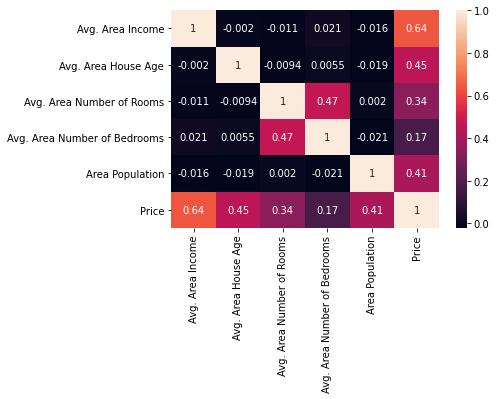

In [58]:
sns.heatmap(df.corr(), annot= True)